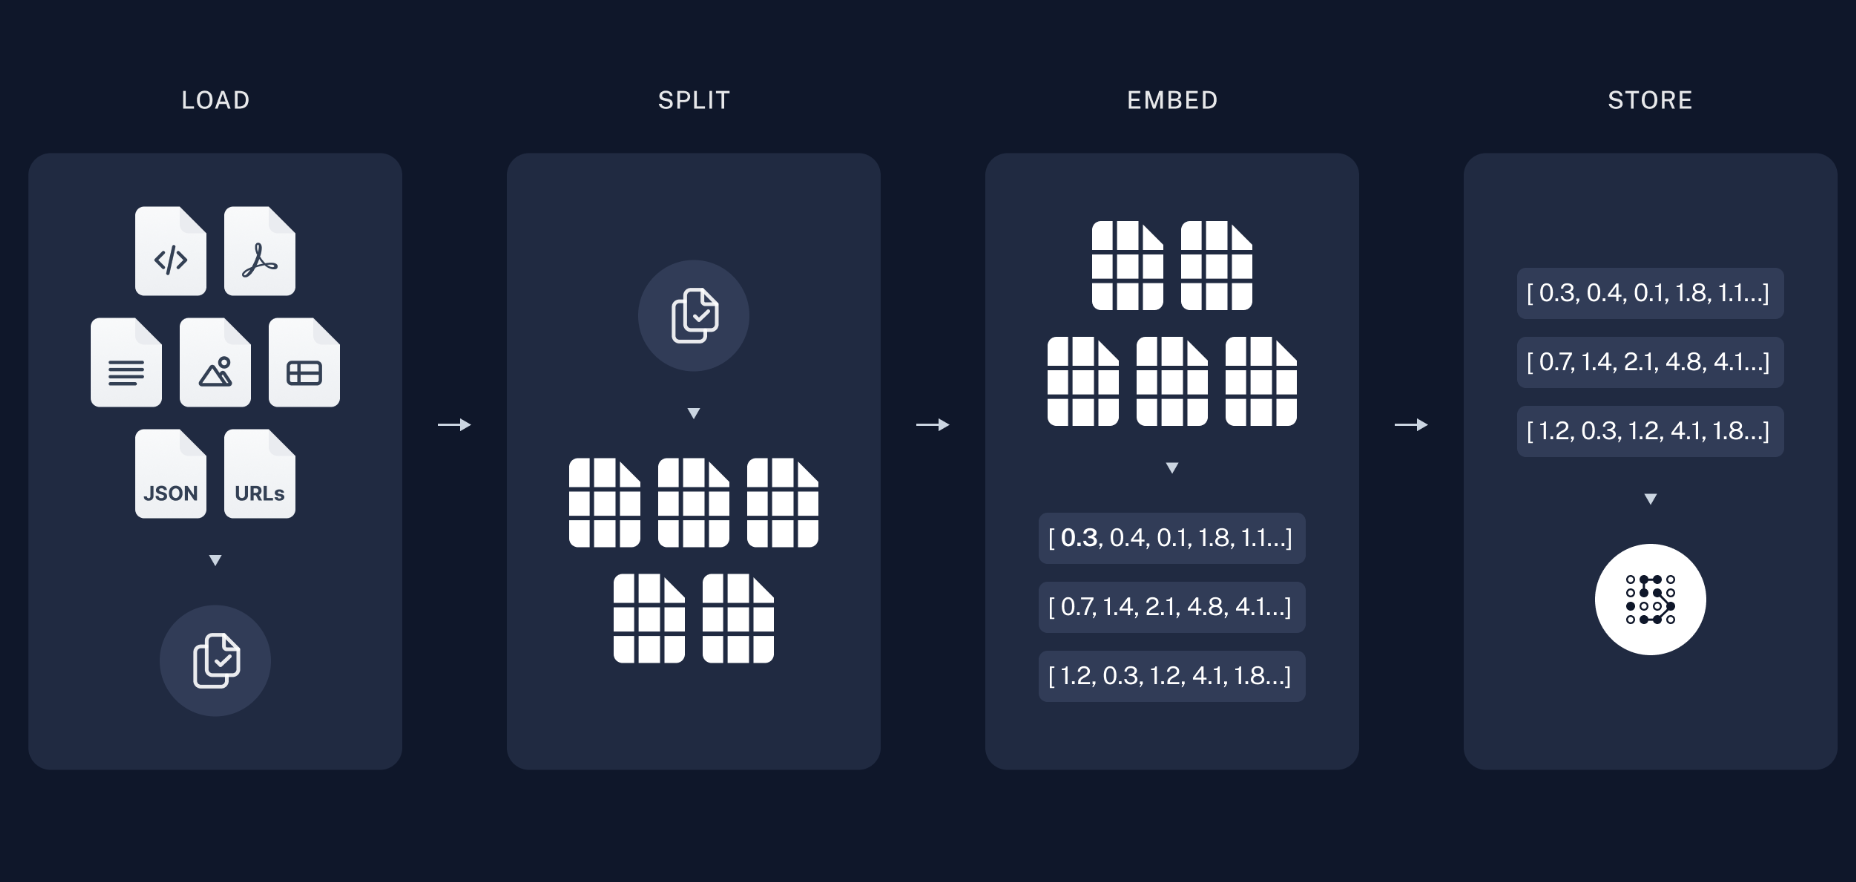

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

In [ ]:
# get environment variables
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "True"

## Data Ingestion / Data Loading

Langchain's "document_loaders" will have all the data source formats (eg. pdf, text, web page, etc..)

In [ ]:
## using Text
from langchain_community.document_loaders import TextLoader

loader = TextLoader('sample.txt')
text_documents = loader.load()
text_documents

In [ ]:
## using Web
from langchain_community.document_loaders import WebBaseLoader
import bs4

loader = WebBaseLoader(
    web_paths = (''),
    bs_kwargs = dict(parse_only = bs4.StroupStrainer(
        class_= ("enter classes by inspecting the web page", "class2")
    )))
web_documents = loader.load()
web_documents

In [ ]:
## using pdf
from langchain_community.document_loaders import PyPDFLoader
import bs4

loader = PyPDFLoader('file.pdf')
pdf_documents = loader.load()
pdf_documents

Once we have loaded the document, the next step is to convert the text into chunks

## Data Transformation / Data Splitting

Langchain's "text_splitter" will split the text into chunks based on user_defined chunk_size

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_to_chunks = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap = 200)
chunks = text_to_chunks.split_documents(pdf_documents)
chunks[:5]

Once we have transformed the documents into chunks, the next step is to convert these chunks into vectors

## Vector Embeddings and Vector Store

Langchains's "embedding" will convert these chunks into vectors. There are several embedding techniques (eg. OpenAI Embeddings, Ollama Embeddings, etc..)

Langchain's "vectorstores" will store these vectors into a database. There are many vector databases offered by Langchain (eg. Chroma, FAISS, Pinecone, Lance)

In [ ]:
## using Chroma vector database
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import Chroma

vector_db = Chroma.from_documents(documents=chunks[:20], embedding=OllamaEmbeddings())

Now, our database is ready and user's can query the database and retrieve information

There are multiple ways to retrieve information. Langchain provides us an option to either do a similarity search or similarity search by vector to directly fetch information from the vector_db without the need of an LLM model

In [ ]:
user_query = "<enter user query here>"
retrieval_answer = vector_db.similarity_search(user_query)
retrieval_answer